In [2]:
# import sys, os, time
# sys.path.append('/mnt/Opaisle/resources/python/')
# sys.path.append('/home/ubuntu/.local/lib/python3.4/site-packages')
# # sys.path.insert(0, '/home/ubuntu/.local/lib/python3.4/site-packages')
# import helper_functions as gp
# import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import datetime#, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
# from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True)
# warnings.filterwarnings("ignore")
# plt.rcParams["patch.force_edgecolor"] = True
# plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

%matplotlib inline

In [2]:
# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 200)

In [3]:
# Data directory
DataDir = "Input/"
OutDir = "Output/"

In [6]:
# query_list = [
#     """
#     SELECT  TOP 100000 *
#     FROM
#         dbo.cust_demo
        
#     ORDER BY
#         customer_key
    
#     """
# ]

In [7]:
# %%time
# df = gp.dmno_execute(query_list, connection='azure')
# # 100k data pull takes about 2 mins

In [4]:
# Read local dataset for faster experiment
df = pd.read_csv(DataDir +"ModelingData1.1M.csv", dtype={'customer_key':object})

In [5]:
df.head()

Unnamed: 0 customer_key  avg_basket_size  avg_basket_price  count_num_txn  count_num_product  total_sales_amt  count_num_items  min_sales_amt  total_cost_amt  total_diff_sale_cost  total_discount_amt  count_num_return  count_online_ord  count_retail_ord  count_onsale_flag  count_promo_code  avg_daysinto_promo  count_regular_priced  count_markdown_priced   age  mega_age mega_type_age gender nm1_gender nm1_marital_status mega_homeowner mega_type_homeowner  mega_education mega_type_education ethnic_code group_ethnic_code mega_presence_of_children mega_type_presence_of_children  mega_number_of_children mega_type_number_of_children address_type  mega_income mega_type_income  adjusted_net_worth home_value credit_ranges  new_credit_range  num_credit_lines bank_card premium_bank_card retail_card upscale_retail_card  social_iq_facebook  social_iq_twitter  mega_fitness_or_exercise mega_type_fitness_or_exercise  merkle_inf_cardholders_rank  merkle_marketing_index  merkle_marketing_rank  merkle_responder_rating spoken_language
0           0          376                6           451.000              1                  3           902.00               12          38.00          211.28                690.72             -248.06                 0                 0                12                  0                 2                 9.0                    12                      0  48.0      48.0             A      F          F                  S              Y                   A             2.0                   A          01                 K                         Y                              A                      1.0                            A            S          5.0                A            304393.0          Q             C               0.0               0.0         Y               NaN           Y                   Y                 2.0                6.0                       0.0                             M                          6.0                   589.0                    9.0                      1.0              01
1           1          454                5           307.235              9                 10          4657.86              108           0.00         1317.96               3339.90             -930.76                17                99                 9                 96                 5                57.0                     6                    100  58.0      58.0             A      F          F                NaN              R                   A             2.0                   A          20                 E                         N                              M                      0.0                          NaN            H          4.0                A             28480.0        NaN           NaN               NaN               NaN         Y               NaN         NaN                 NaN                 6.0                4.0                       1.0                             A                          2.0                     7.0                    2.0                      0.0              20
2           2          584                7           324.070              1                  6           324.07                7          27.65           96.40                227.67                 NaN                 0                 0                 7                  0                 0                 NaN                     0                      0   0.0       NaN           NaN    NaN        NaN                NaN            NaN                 NaN             NaN                 NaN         NaN               NaN                       NaN                            NaN                      NaN                          NaN          NaN          NaN              NaN                 NaN        NaN           NaN               NaN               NaN       NaN               NaN         NaN                 NaN                 NaN                NaN                       NaN               

In [6]:
df.shape

(1143715, 57)

In [70]:
# df.to_csv(DataDir + "ModelingData100K.csv")

In [9]:
df.columns

Index(['customer_key', 'avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 'avg_daysinto_promo', 'count_regular_priced', 'count_markdown_priced', 'age', 'mega_age', 'mega_type_age', 'gender', 'nm1_gender', 'nm1_marital_status', 'mega_homeowner', 'mega_type_homeowner', 'mega_education', 'mega_type_education', 'ethnic_code', 'group_ethnic_code', 'mega_presence_of_children', 'mega_type_presence_of_children', 'mega_number_of_children', 'mega_type_number_of_children', 'address_type', 'mega_income', 'mega_type_income', 'adjusted_net_worth', 'home_value', 'credit_ranges', 'new_credit_range', 'num_credit_lines', 'bank_card', 'premium_bank_card', 'retail_card', 'upscale_retail_card', 'social_iq_facebook', 'social_iq_twitter', 'mega_fitness_or_exercise', 

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

count    8.222870e+05
mean              NaN
std               NaN
min              -inf
25%      1.500000e+01
50%      2.593590e+01
75%      4.000000e+01
max               inf
Name: perc_discount, dtype: float64

### Lets consider only transaction level features

In [7]:
# txn_cols = ['customer_key', 'avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 
#             'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 
#             'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 
#             'avg_daysinto_promo', 'count_regular_priced', 'count_markdown_priced']
txnCols = ['avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 'count_num_items', 
           'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 'count_num_return', 
           'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 'avg_daysinto_promo', 
           'count_regular_priced', 'count_markdown_priced']

In [ ]:
txnColsToAdd = ['avg_basket_price', 'total_sales_amt', 'total_discount_amt', 'count_onsale_flag', 'count_promo_code', 
                'count_markdown_priced']

In [ ]:
demoCols = ['age', 'mega_age', 'mega_type_age', 'gender', 'nm1_gender', 'nm1_marital_status', 'mega_homeowner', 
            'mega_type_homeowner', 'mega_education', 'mega_type_education', 'ethnic_code', 'group_ethnic_code', 
            'mega_presence_of_children', 'mega_type_presence_of_children', 'mega_number_of_children', 'address_type', 
            'mega_income', 'mega_type_income', 'adjusted_net_worth', 'home_value', 'credit_ranges', 'new_credit_range', 
            'num_credit_lines', 'bank_card', 'social_iq_facebook', 'social_iq_twitter', 'mega_fitness_or_exercise', 
            'mega_type_fitness_or_exercise', 'merkle_inf_cardholders_rank', 'merkle_marketing_index', 'merkle_marketing_rank', 
            'merkle_responder_rating', 'spoken_language']

In [ ]:
demoColsToAdd = ['gender', 'nm1_marital_status', 'mega_education', 'mega_presence_of_children', 'adjusted_net_worth']

In [24]:
# Filter out 
df = df[df['age']>=18] #373985
df = df[df['gender'] != 'U']
df = df[(df['total_sales_amt'] < 1000) & (df['total_sales_amt'] > -500) & (df['total_sales_amt'] == 0)]
df = df[(abs(df['total_cost_amt']) < 1000)]

In [8]:
# df = df[txn_cols]

In [15]:
cc = pd.DataFrame(df.corr())

In [16]:
cc

avg_basket_size  avg_basket_price  count_num_txn  count_num_product  total_sales_amt  count_num_items  min_sales_amt  total_cost_amt  total_diff_sale_cost  total_discount_amt  count_num_return  count_online_ord  count_retail_ord  count_onsale_flag  count_promo_code  avg_daysinto_promo  count_regular_priced  count_markdown_priced
avg_basket_size               1.000000          0.817872      -0.027932           0.337973         0.610472         0.411036       0.001655        0.623763              0.589082           -0.538555          0.029559          0.227047          0.511297           0.151614          0.377939            0.002434              0.342846               0.344437
avg_basket_price              0.817872          1.000000       0.040445           0.315668         0.777197         0.431235       0.131347        0.720899              0.774917           -0.714988          0.097402          0.313333          0.360425           0.108023          0.427011            0.003904              0.414272               0.304588
count_num_txn                -0.027932          0.040445       1.000000           0.774545         0.303901         0.556224      -0.315348        0.302398              0.296020           -0.350808          0.545107          0.487030          0.270739           0.330356          0.535061            0.046586              0.437275               0.455854
count_num_product             0.337973          0.315668       0.774545           1.000000         0.468868         0.613150      -0.314891        0.476215              0.453415           -0.525661          0.461031          0.447937          0.506791           0.293060          0.546065            0.036984              0.487314               0.485948
total_sales_amt               0.610472          0.777197       0.303901           0.468868         1.000000         0.684849      -0.028597        0.939138              0.993123           -0.910788          0.311251          0.587262          0.362376           0.267360          0.603387            0.023287              0.631540               0.526912
count_num_items               0.411036          0.431235       0.556224           0.613150         0.684849         1.000000      -0.205923        0.662268              0.673629           -0.600915          0.866741          0.919108          0.384824           0.492894          0.645238            0.033044              0.863218               0.834104
min_sales_amt                 0.001655          0.131347      -0.315348          -0.314891        -0.028597        -0.205923       1.000000       -0.036697             -0.025046            0.024407         -0.213519         -0.157537         -0.153570          -0.102606         -0.185937           -0.015866             -0.153203              -0.169683
total_cost_amt                0.623763          0.720899       0.302398           0.476215         0.939138         0.662268      -0.036697        1.000000              0.892458           -0.846428          0.275561          0.527710          0.444571           0.320288          0.588299            0.027437              0.568868               0.558685
total_diff_sale_cost          0.589082          0.774917       0.296020           0.453415         0.993123         0.673629      -0.025046        0.892458              1.000000           -0.906845          0.314818          0.591337          0.324355           0.241938          0.591864            0.021198              0.635456               0.501530
total_discount_amt           -0.538555         -0.714988      -0.350808          -0.525661        -0.910788        -0.600915       0.024407       -0.846428             -0.906845            1.000000         -0.247892         -0.490683         -0.365191          -0.238029         -0.620139           -0.021929             -0.556110              -0.449294
count_num_return              0.029559          0.097402       0.545107           0.461031         0.311251         0.866741     

### Lets consider only a few features

In [72]:
# txn_cols = ['customer_key', 'total_diff_sale_cost', 'total_discount_amt', 'count_promo_code', 
#             'avg_daysinto_promo', 'count_regular_priced', 'count_markdown_priced',
#            'mega_income', 'adjusted_net_worth']

In [73]:
# df = df[txn_cols]

In [74]:
# Get some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


customer_key total_diff_sale_cost total_discount_amt count_promo_code avg_daysinto_promo count_regular_priced count_markdown_priced mega_income adjusted_net_worth
column type            object              float64            float64            int64            float64                int64                 int64     float64            float64
null values (nb)            0                    0              17415                0              28080                    0                     0        3137               3137
null values (%)             0                    0             17.415                0              28.08                    0                     0       3.137              3.137

### Consider all numerical columns and impute with 0 values


In [14]:
# Consider all numerical columns and impute with 0 values
numData = df.select_dtypes(include=['float64', 'int64'])
numCol = numData.columns
print(numCol)
# Imputation - with 0 (discount_amt, any other cont. variables)
df.fillna({x:0 for x in numCol}, inplace=True) 

Index(['avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 'avg_daysinto_promo', 'count_regular_priced', 'count_markdown_priced', 'age', 'mega_age', 'mega_education', 'mega_number_of_children', 'mega_income', 'adjusted_net_worth', 'new_credit_range', 'num_credit_lines', 'social_iq_facebook', 'social_iq_twitter', 'mega_fitness_or_exercise', 'merkle_inf_cardholders_rank', 'merkle_marketing_index', 'merkle_marketing_rank', 'merkle_responder_rating', 'perc_discount'], dtype='object')


customer_key  avg_basket_size  avg_basket_price  count_num_txn  count_num_product  total_sales_amt  count_num_items  min_sales_amt  total_cost_amt  total_diff_sale_cost  total_discount_amt  count_num_return  count_online_ord  count_retail_ord  count_onsale_flag  count_promo_code  avg_daysinto_promo  count_regular_priced  count_markdown_priced   age  mega_age mega_type_age gender nm1_gender nm1_marital_status mega_homeowner mega_type_homeowner  mega_education mega_type_education ethnic_code group_ethnic_code mega_presence_of_children mega_type_presence_of_children  mega_number_of_children mega_type_number_of_children address_type  mega_income mega_type_income  adjusted_net_worth home_value credit_ranges  new_credit_range  num_credit_lines bank_card premium_bank_card retail_card upscale_retail_card  social_iq_facebook  social_iq_twitter  mega_fitness_or_exercise mega_type_fitness_or_exercise  merkle_inf_cardholders_rank  merkle_marketing_index  merkle_marketing_rank  merkle_responder_rating spoken_language  perc_discount
0                376                6      4.510000e+02              1                  3     9.020000e+02               12          38.00    2.112800e+02          6.907200e+02       -2.480600e+02                 0                 0                12                  0                 2                 9.0                    12                      0  48.0      48.0             A      F          F                  S              Y                   A             2.0                   A          01                 K                         Y                              A                      1.0                            A            S          5.0                A            304393.0          Q             C               0.0               0.0         Y               NaN           Y                   Y                 2.0                6.0                       0.0                             M                          6.0                   589.0                    9.0                      1.0              01   2.750111e+01
1                454                5      3.072350e+02              9                 10     4.657860e+03              108           0.00    1.317960e+03          3.339900e+03       -9.307600e+02                17                99                 9                 96                 5                57.0                     6                    100  58.0      58.0             A      F          F                NaN              R                   A             2.0                   A          20                 E                         N                              M                      0.0                          NaN            H          4.0                A             28480.0        NaN           NaN               0.0               0.0         Y               NaN         NaN                 NaN                 6.0                4.0                       1.0                             A                          2.0                     7.0                    2.0                      0.0              20   1.998257e+01
2                584                7      3.240700e+02              1                  6     3.240700e+02                7          27.65    9.640000e+01          2.276700e+02        0.000000e+00                 0                 0                 7                  0                 0                 0.0                     0                      0   0.0       0.0           NaN    NaN        NaN                NaN            NaN                 NaN             0.0                 NaN         NaN               NaN                       NaN                            NaN                      0.0                          NaN          NaN          0.0              NaN                 0.0        NaN           NaN               0.0               0.0       NaN               NaN         NaN                 NaN                 0.0                0.0                       0.

### Lets check on null values again

In [31]:
# Filter out 
df = df[df['age']>=18] #373985
df = df[df['gender'] != 'U']
df = df[(df['total_sales_amt'] < 1000) | (df['total_sales_amt'] > -500) | (df['total_sales_amt'] != 0)]
df = df[(abs(df['total_cost_amt']) < 1000)]

In [32]:
dfcheck = df[df['total_sales_amt']==0]

In [33]:
dfcheck.shape

(37426, 57)

In [17]:
df['total_sales_amt'].describe()

count    1.143715e+06
mean     5.048511e+02
std      1.222873e+03
min     -1.364824e+04
25%      6.117000e+01
50%      1.519000e+02
75%      4.251000e+02
max      2.115340e+05
Name: total_sales_amt, dtype: float64

In [18]:
df['total_discount_amt'].describe()

count    1.143715e+06
mean    -1.044298e+02
std      2.147207e+02
min     -2.070383e+04
25%     -1.135400e+02
50%     -3.158000e+01
75%      0.000000e+00
max      5.643680e+03
Name: total_discount_amt, dtype: float64

In [15]:
df['perc_discount'] = -100* df['total_discount_amt']/df['total_sales_amt']
df['perc_discount'].describe()

count    1.100682e+06
mean              NaN
std               NaN
min              -inf
25%     -0.000000e+00
50%      1.885160e+01
75%      3.547239e+01
max               inf
Name: perc_discount, dtype: float64

In [76]:
# Get some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


customer_key total_diff_sale_cost total_discount_amt count_promo_code avg_daysinto_promo count_regular_priced count_markdown_priced mega_income adjusted_net_worth
column type            object              float64            float64            int64            float64                int64                 int64     float64            float64
null values (nb)            0                    0                  0                0                  0                    0                     0           0                  0
null values (%)             0                    0                  0                0                  0                    0                     0           0                  0

### Lets check the summary of the columns

In [77]:
df.describe()

total_diff_sale_cost  total_discount_amt  count_promo_code  avg_daysinto_promo  count_regular_priced  count_markdown_priced    mega_income  adjusted_net_worth
count         100000.000000        1.000000e+05     100000.000000         100000.0000         100000.000000          100000.000000  100000.000000        1.000000e+05
mean             489.544753       -1.332804e+02          1.628530             48.1509              7.238370               7.003200       7.270530        3.471774e+05
std             1103.556557        2.517866e+02          1.734258            210.9038             19.917181              18.846092       3.176159        2.309515e+05
min            -3943.790000       -5.688460e+03          0.000000              0.0000              0.000000               0.000000       0.000000       -8.614200e+04
25%               42.730000       -1.536000e+02          0.000000              0.0000              0.000000               0.000000       5.000000        1.789168e+05
50%              137.025000       -4.400000e+01          1.000000             10.0000              1.000000               1.000000       7.000000        3.010885e+05
75%              466.497500       -1.598721e-13          2.000000             39.0000              6.000000               6.000000      10.000000        4.719992e+05
max            39050.520000        4.887500e+03         20.000000           3519.0000            696.000000            1080.000000      12.000000        1.386290e+06

Remove highly correlated variables

### Lets create Kmeans clustering on customer data

In [18]:
df.head()

Unnamed: 0 customer_key  avg_basket_size  avg_basket_price  count_num_txn  count_num_product  total_sales_amt  count_num_items  min_sales_amt  total_cost_amt  total_diff_sale_cost  total_discount_amt  count_num_return  count_online_ord  count_retail_ord  count_onsale_flag  count_promo_code  avg_daysinto_promo  count_regular_priced  count_markdown_priced  age  mega_age mega_type_age gender nm1_gender nm1_marital_status mega_homeowner mega_type_homeowner  mega_education mega_type_education ethnic_code group_ethnic_code mega_presence_of_children mega_type_presence_of_children  mega_number_of_children mega_type_number_of_children address_type  mega_income mega_type_income  adjusted_net_worth home_value credit_ranges  new_credit_range  num_credit_lines bank_card premium_bank_card retail_card upscale_retail_card  social_iq_facebook  social_iq_twitter  mega_fitness_or_exercise mega_type_fitness_or_exercise  merkle_inf_cardholders_rank  merkle_marketing_index  merkle_marketing_rank  merkle_responder_rating spoken_language
0           0          376                6           451.000              1                  3           902.00               12          38.00          211.28                690.72             -248.06                 0                 0                12                  0                 2                 9.0                    12                      0   48      48.0             A      F          F                  S              Y                   A             2.0                   A          01                 K                         Y                              A                      1.0                            A            S          5.0                A            304393.0          Q             C               0.0               0.0         Y               NaN           Y                   Y                 2.0                6.0                       0.0                             M                          6.0                   589.0                    9.0                      1.0              01
1           1          454                5           307.235              9                 10          4657.86              108           0.00         1317.96               3339.90             -930.76                17                99                 9                 96                 5                57.0                     6                    100   58      58.0             A      F          F                NaN              R                   A             2.0                   A          20                 E                         N                              M                      0.0                          NaN            H          4.0                A             28480.0        NaN           NaN               NaN               NaN         Y               NaN         NaN                 NaN                 6.0                4.0                       1.0                             A                          2.0                     7.0                    2.0                      0.0              20
2           2          584                7           324.070              1                  6           324.07                7          27.65           96.40                227.67                 NaN                 0                 0                 7                  0                 0                 NaN                     0                      0    0       NaN           NaN    NaN        NaN                NaN            NaN                 NaN             NaN                 NaN         NaN               NaN                       NaN                            NaN                      NaN                          NaN          NaN          NaN              NaN                 NaN        NaN           NaN               NaN               NaN       NaN               NaN         NaN                 NaN                 NaN                NaN                       NaN                   

In [15]:
df_sample = df.sample(5000)[['customer_key', 'total_diff_sale_cost',  'total_discount_amt', 'count_markdown_priced', 'adjusted_net_worth']]

In [16]:
df_sample.head()

customer_key  total_diff_sale_cost  total_discount_amt  count_markdown_priced  adjusted_net_worth
73421      6159419                170.40             -114.00                      0            520248.0
50766      4240560                 31.32               -4.06                      4            185811.0
67027      5592608                 48.90              -27.20                      0            328416.0
965          63572                 64.77              -29.20                      0            274994.0
96325      8052108                839.28             -209.40                      8            158607.0

In [17]:
# Create the matrix for kmeans algorithms
# matrix = df.drop(['customer_key'], axis=1).as_matrix() # deprecated
matrix = df_sample.drop(['customer_key'], axis=1).values

In [19]:
# Make sure to scale the variables
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  1.64054116e+02  -5.29036020e+01   3.53420000e+00   3.70816165e+05]


### Run PCA to get a sense of how many components would be important
On 5000 sample data seems like 5 top components can explain about 80% variance in the dataset

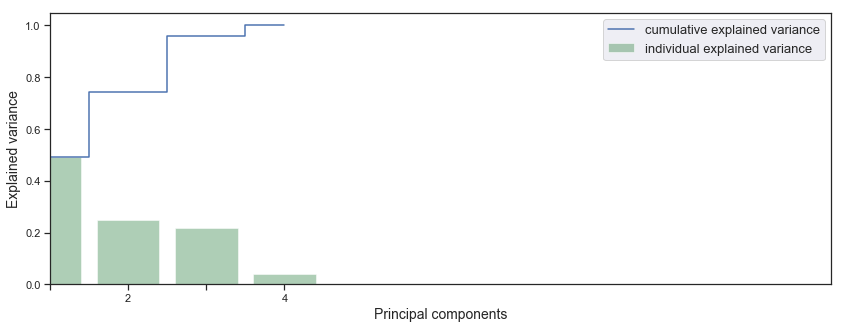

In [20]:
# Run PCA to get a sense of how many components would be important

pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)


fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

### Lets run Kmeans clustering on the whole dataset and assess best #clusters based on silhouette score

In [21]:
# Lets define clusters of customers based on the silhouette score
#%%time
max_score = 0
best_numclus = 0
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    if(silhouette_avg > max_score):
        max_score = silhouette_avg
        best_numclus = n_clusters
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

print("Best number of clusters", best_numclus)

For n_clusters = 2 The average silhouette_score is : 0.477259331766
For n_clusters = 3 The average silhouette_score is : 0.369664605877
For n_clusters = 4 The average silhouette_score is : 0.381709307999
For n_clusters = 5 The average silhouette_score is : 0.353090598691
For n_clusters = 6 The average silhouette_score is : 0.358654385727
For n_clusters = 7 The average silhouette_score is : 0.297018182384
For n_clusters = 8 The average silhouette_score is : 0.296554045151
For n_clusters = 9 The average silhouette_score is : 0.28581621504
Best number of clusters 2


In [22]:
X=scaled_matrix

For n_clusters = 2 The average silhouette_score is : 0.477259331766


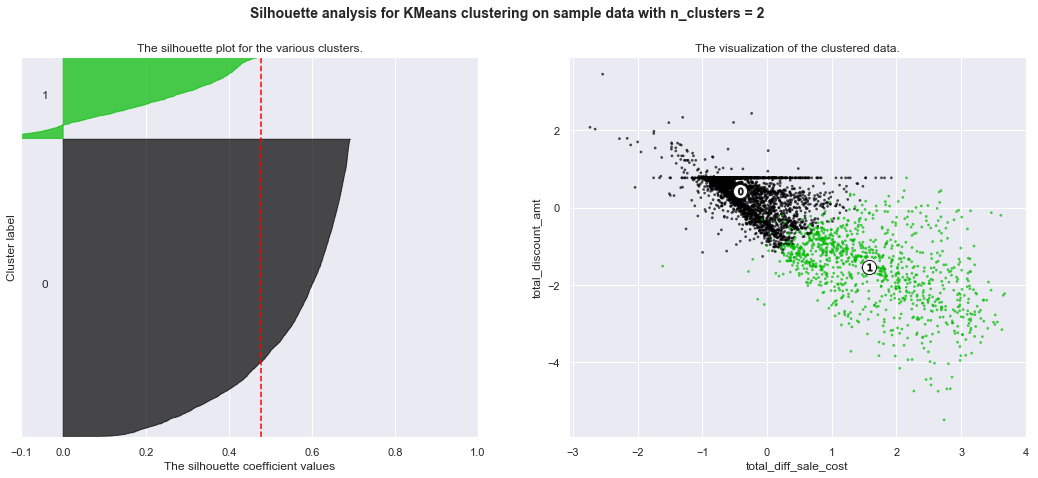

For n_clusters = 3 The average silhouette_score is : 0.368900190275


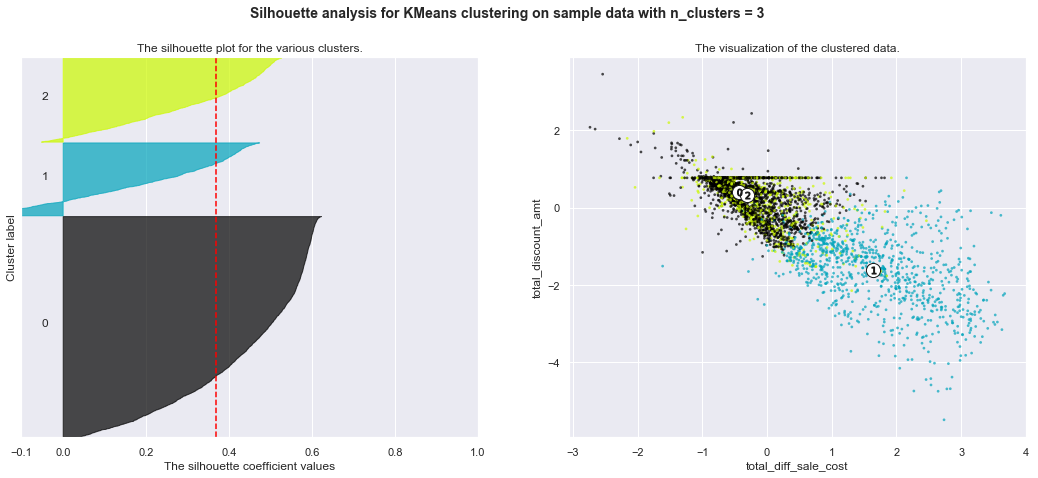

For n_clusters = 4 The average silhouette_score is : 0.382966597176


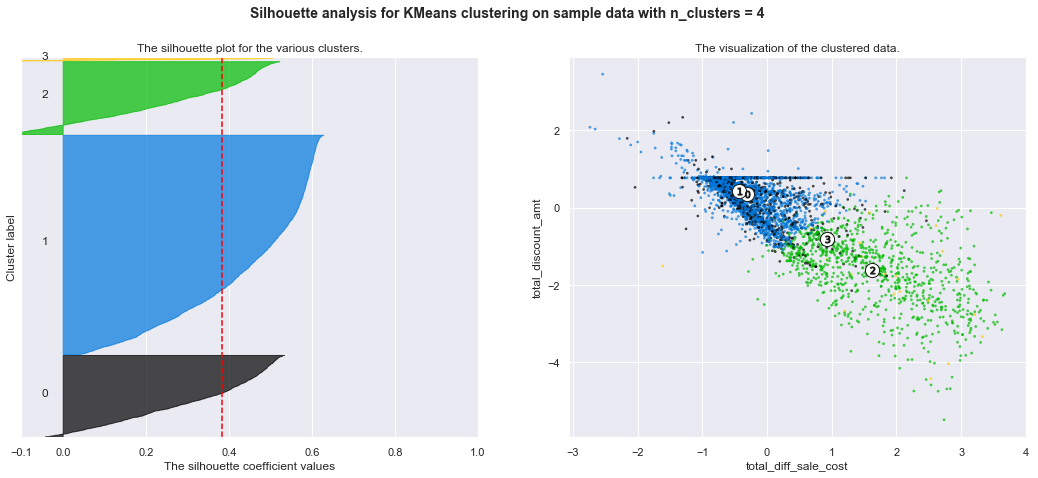

For n_clusters = 5 The average silhouette_score is : 0.353090598691


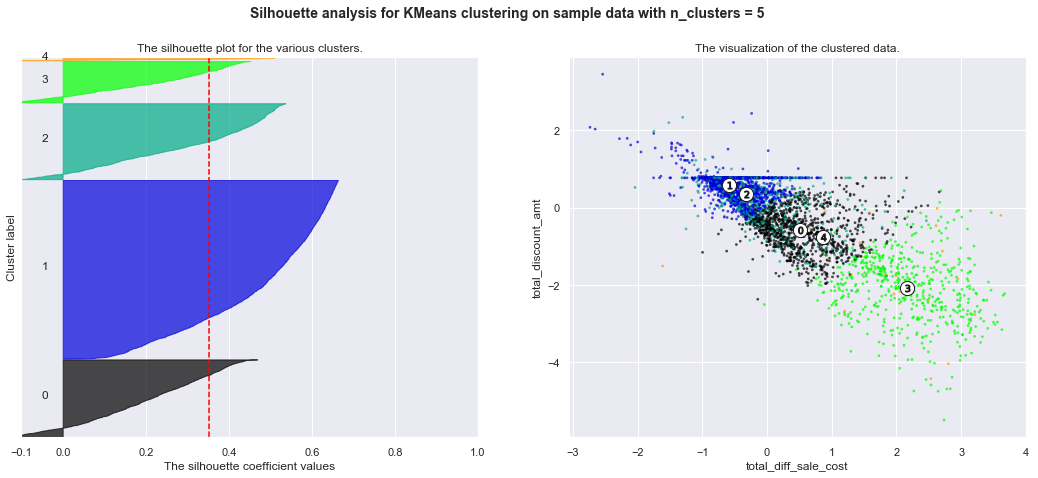

For n_clusters = 6 The average silhouette_score is : 0.361821081736


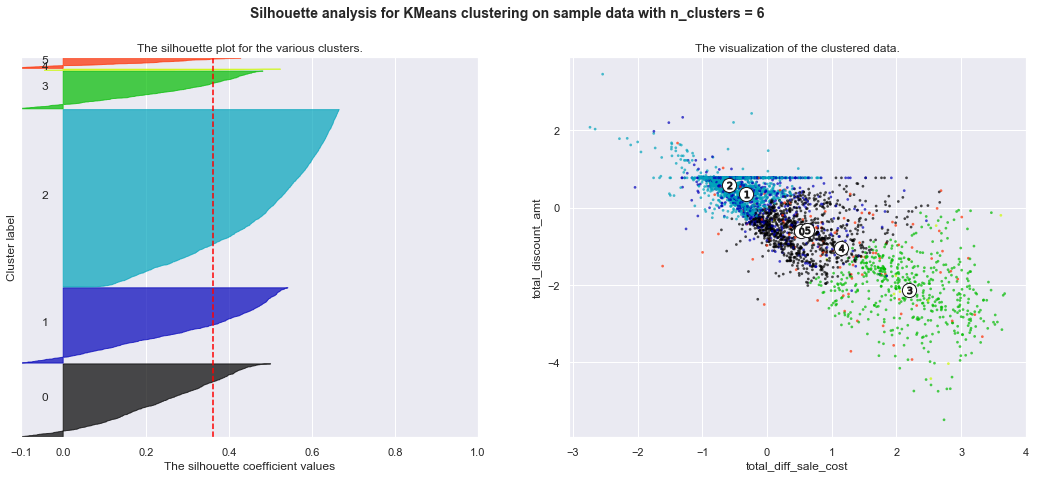

For n_clusters = 7 The average silhouette_score is : 0.350631397005


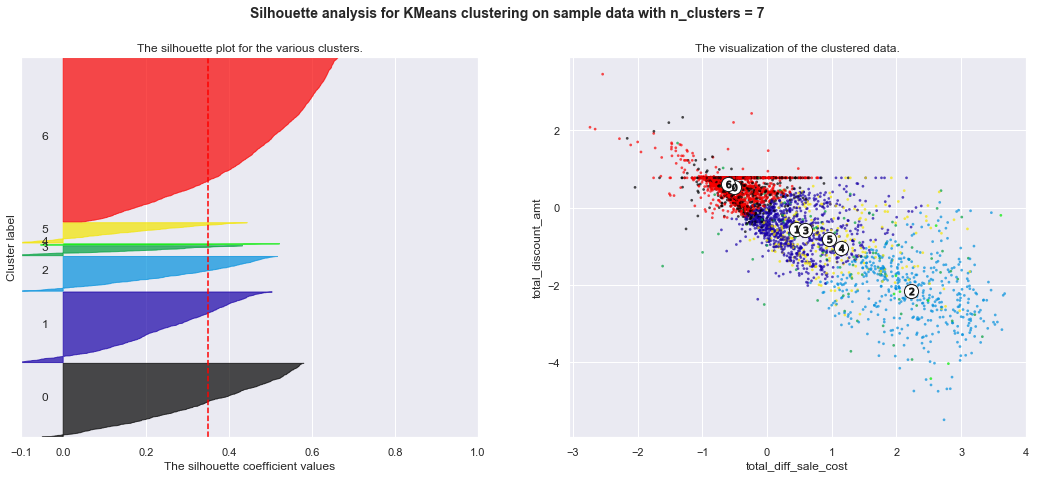

For n_clusters = 8 The average silhouette_score is : 0.297386672816


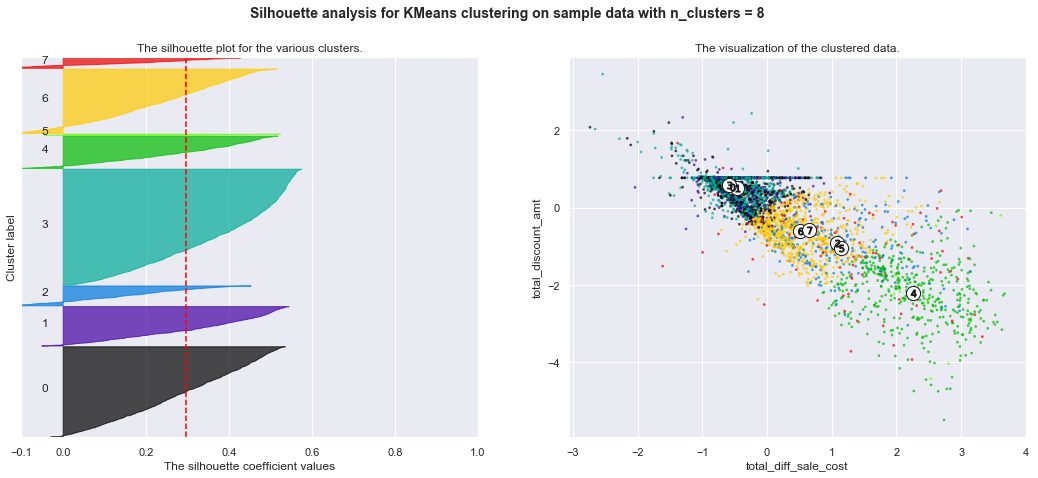

For n_clusters = 9 The average silhouette_score is : 0.284831702969


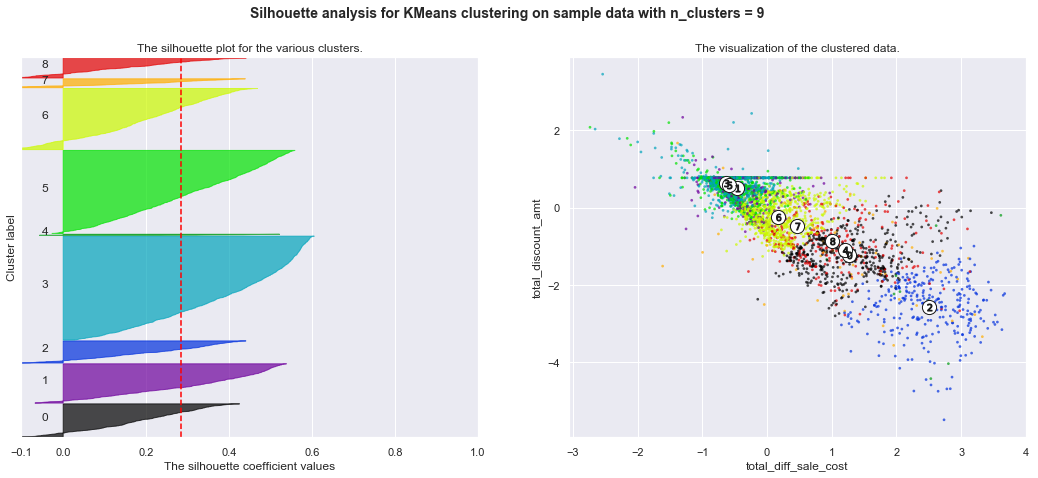

In [23]:
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    label_x = df_sample.columns[1]
    label_y = df_sample.columns[2]


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(label_x)
    ax2.set_ylabel(label_y)
    
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    plt.savefig('Output/ModelFigures/silhouettescore_'+str(n_clusters)+'.png')

### Seems like best number of clusters = 2

In [25]:
# Seems 2/3/5 is the best
best_numclus = 2 # Set it manual
n_clusters = best_numclus
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.477259331766


In [26]:
# Check the number of customers in each class
pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['Number of clustomers']).T

1     0
Number of clustomers  3937  1063

### Lets try to visualize on PCAs

In [27]:
# Lets keep 6 top PCA components
n_components = 3
pca = PCA(n_components)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters)

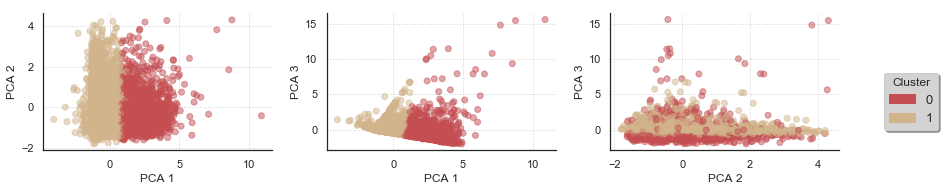

In [28]:
# in order to create a representation of the various clusters on pcas:

import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(n_components):
    for iy in range(ix+1, n_components):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()
plt.savefig('Output/ModelFigures/clusters_on_pcas.png')

In [29]:
df_sample['cluster_kmeans'] = pd.Series(clusters, index=df_sample.index)

In [30]:
df_sample.head()

customer_key  total_diff_sale_cost  total_discount_amt  count_markdown_priced  adjusted_net_worth  cluster_kmeans
73421      6159419                170.40             -114.00                      0            520248.0               1
50766      4240560                 31.32               -4.06                      4            185811.0               1
67027      5592608                 48.90              -27.20                      0            328416.0               1
965          63572                 64.77              -29.20                      0            274994.0               1
96325      8052108                839.28             -209.40                      8            158607.0               0

In [31]:
df_sample['cluster_kmeans'].value_counts()

1    3937
0    1063
Name: cluster_kmeans, dtype: int64

In [32]:
# Change a few numerical columns to string
colsToString = ['customer_key']
df_sample[colsToString] = df_sample[colsToString].astype(str)

In [33]:
# df_sample.dtypes
df_sample.columns

Index(['customer_key', 'total_diff_sale_cost', 'total_discount_amt', 'count_markdown_priced', 'adjusted_net_worth', 'cluster_kmeans'], dtype='object')

In [34]:
# df_plot = df_sample[['count_regular_priced', 'count_markdown_priced', 'count_promo_code', 'avg_daysinto_promo', 'cluster_kmeans']]
df_plot = df_sample.drop('customer_key', axis=1)


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


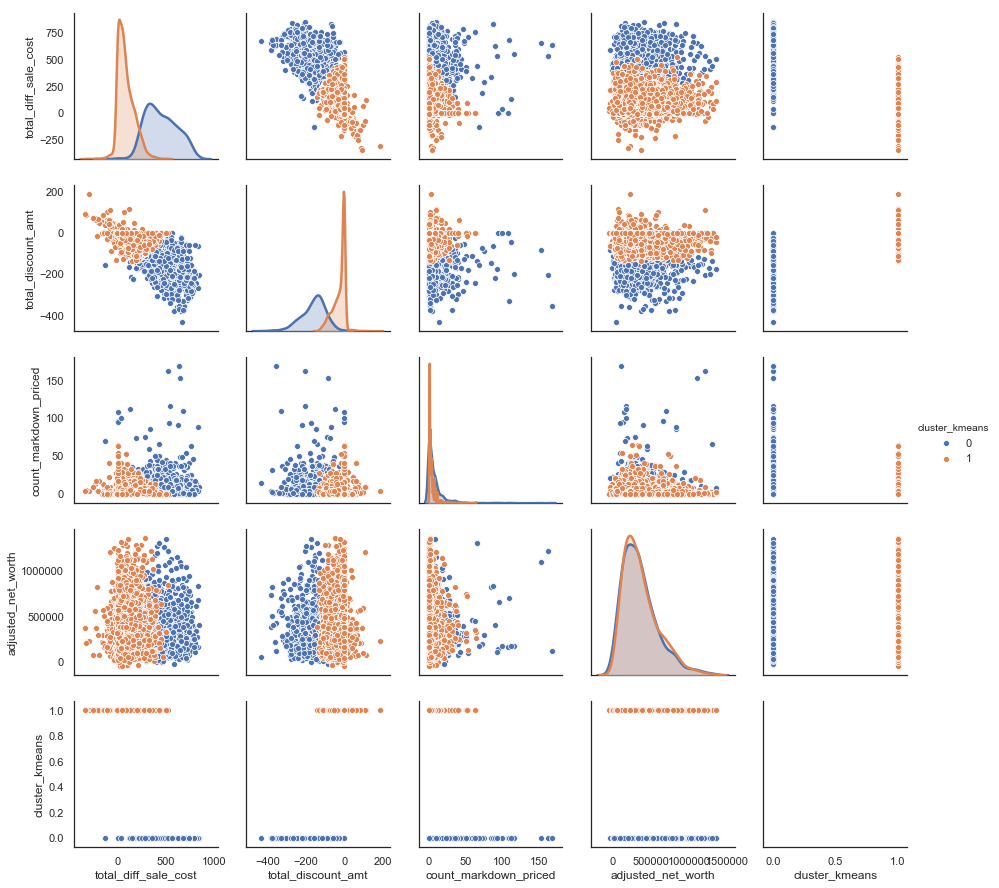

In [35]:
g = sns.pairplot(df_plot, hue = 'cluster_kmeans' )
plt.show()
# plt.savefig('Output/ModelFigures/clusters_on_vars.png')

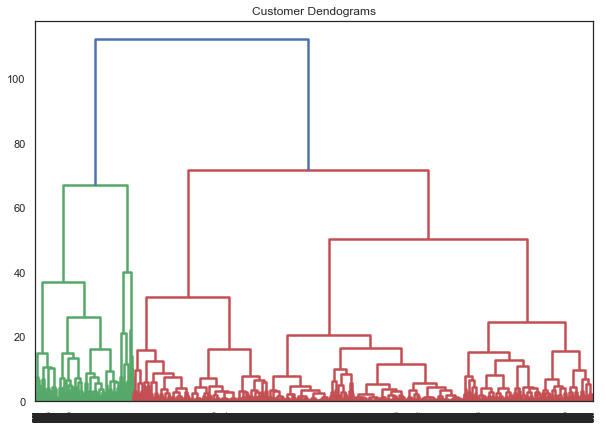

In [36]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(scaled_matrix, method='ward'))  

In [37]:
n_clusters = 2

In [38]:
# Lets try Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(scaled_matrix) 
print(cluster.labels_) 
silhouette_avg = silhouette_score(scaled_matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

[0 0 0 ..., 0 0 0]
For n_clusters = 2 The average silhouette_score is : 0.487992878485


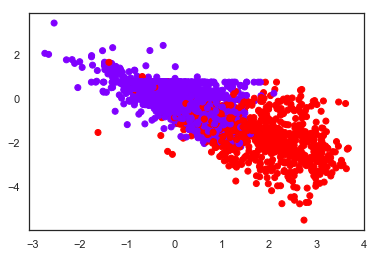

In [39]:
plt.scatter(scaled_matrix[:,0],scaled_matrix[:,1], c=cluster.labels_, cmap='rainbow')  

In [40]:
df_sample['cluster_hier'] = pd.Series(clusters, index=df_sample.index)

In [41]:
df_sample.head()

customer_key  total_diff_sale_cost  total_discount_amt  count_markdown_priced  adjusted_net_worth  cluster_kmeans  cluster_hier
73421      6159419                170.40             -114.00                      0            520248.0               1             0
50766      4240560                 31.32               -4.06                      4            185811.0               1             0
67027      5592608                 48.90              -27.20                      0            328416.0               1             0
965          63572                 64.77              -29.20                      0            274994.0               1             0
96325      8052108                839.28             -209.40                      8            158607.0               0             1

In [42]:
df_sample['cluster_hier'].value_counts()

0    4125
1     875
Name: cluster_hier, dtype: int64

In [43]:
df_sample['cluster_kmeans'].value_counts()

1    3937
0    1063
Name: cluster_kmeans, dtype: int64

In [44]:
# df_sample.dtypes
df_sample.columns

Index(['customer_key', 'total_diff_sale_cost', 'total_discount_amt', 'count_markdown_priced', 'adjusted_net_worth', 'cluster_kmeans', 'cluster_hier'], dtype='object')

In [45]:
# df_plot = df_sample[['count_regular_priced', 'count_markdown_priced', 'count_promo_code', 'avg_daysinto_promo', 'cluster_kmeans']]
df_plot = df_sample.drop('customer_key', axis=1)


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


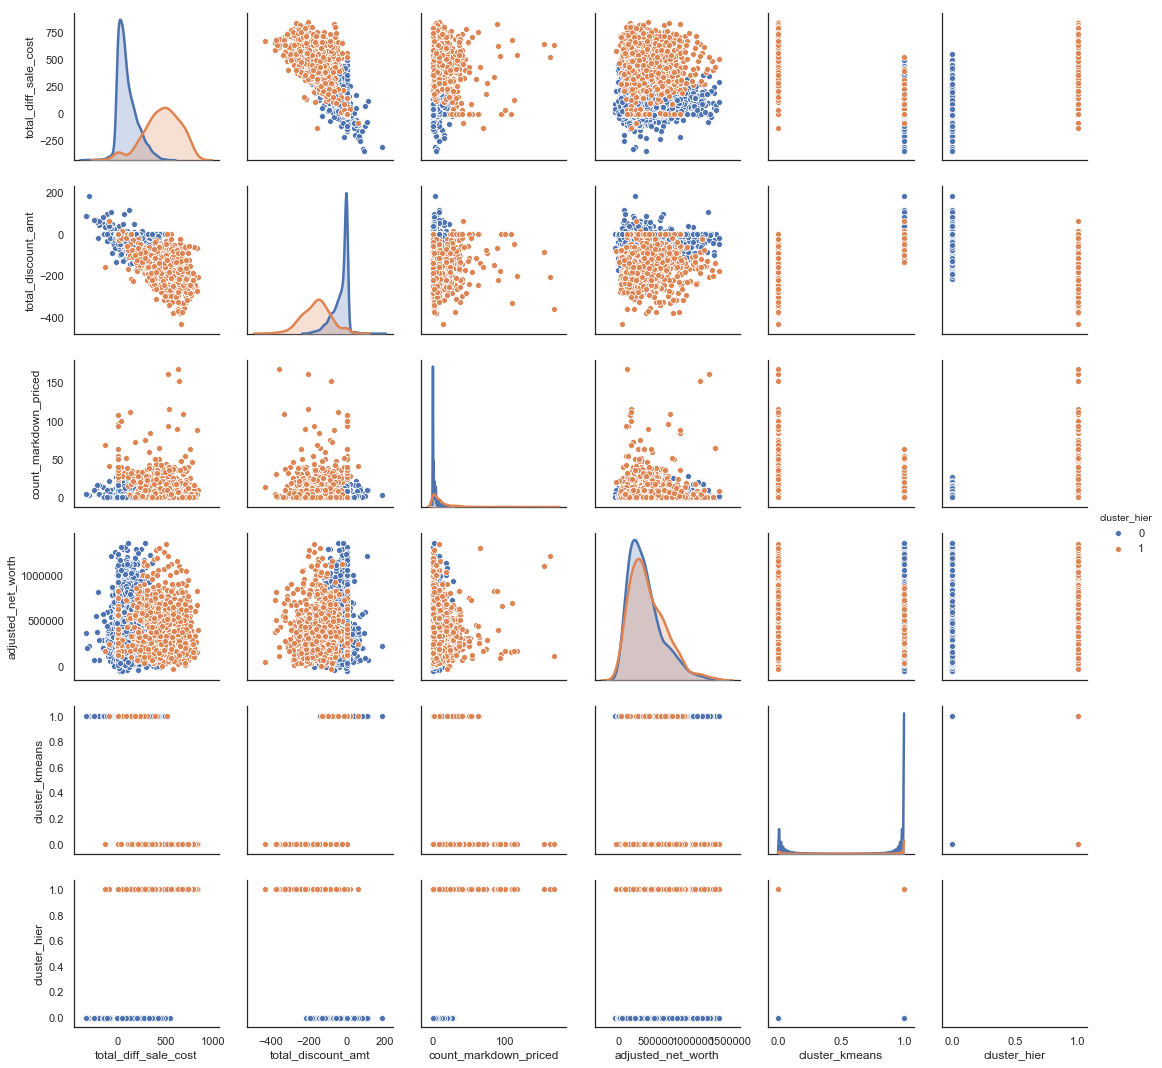

In [46]:
g = sns.pairplot(df_plot, hue = 'cluster_hier' )
plt.show()
# plt.savefig('Output/ModelFigures/clusters_on_vars.png')